In [1]:
import pandas as pd

df = pd.read_csv(
    "facebook_combined.txt",      # nama file input
    sep=" ",                      # pemisah spasi
    header=None,                  # tidak ada header
    names=["user_id", "friend_id"]  # nama kolom yang diinginkan
)

output_file = "facebook_friendship.csv"
df.to_csv(output_file, index=False)

print(f"Konversi selesai! File CSV disimpan sebagai: {output_file}")

Konversi selesai! File CSV disimpan sebagai: facebook_friendship.csv


In [2]:
total_users = len(pd.unique(df[['user_id','friend_id']].values.ravel()))
print(f"Total jumlah user (nodes): {total_users}")

Total jumlah user (nodes): 4039


In [3]:
pip install python-louvain


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import community as community_louvain

In [5]:
import community.community_louvain as community_louvain

In [6]:
import networkx as nx
import community.community_louvain as community_louvain

G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

partition = community_louvain.best_partition(G)
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 1,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 2,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

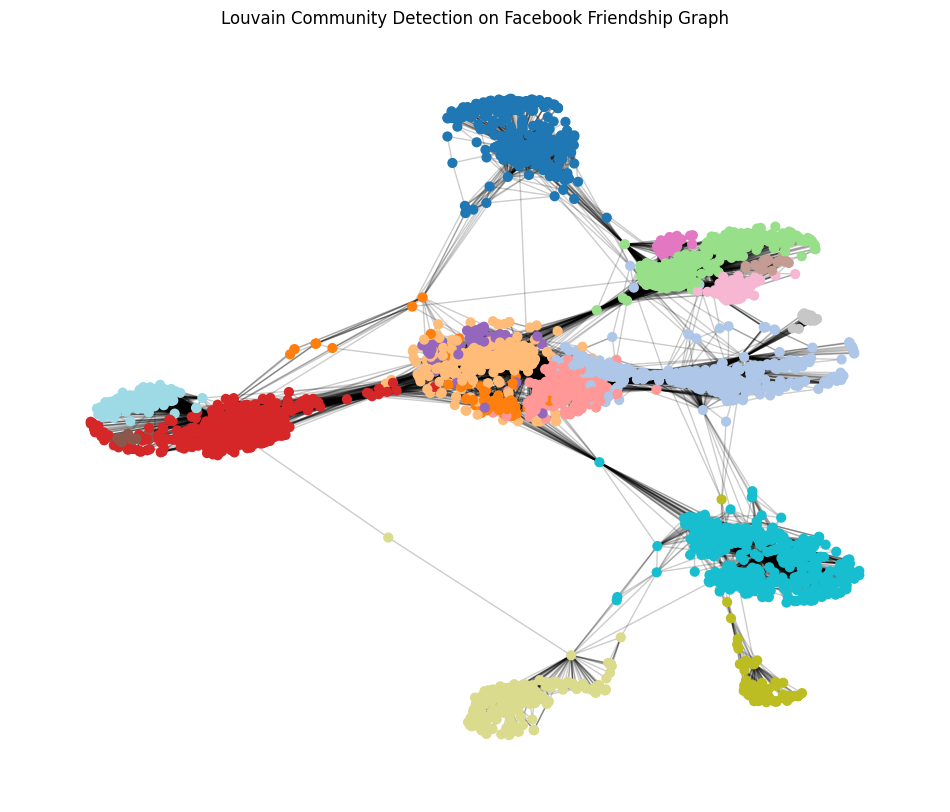

In [7]:
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# Load edge list
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

# Hitung komunitas
partition = community_louvain.best_partition(G)

# Buat warna node
colors = [partition[node] for node in G.nodes()]

# Layout
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=40, node_color=colors, cmap=plt.cm.tab20)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Louvain Community Detection on Facebook Friendship Graph")
plt.axis("off")
plt.show()

In [8]:
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

# Sort community IDs for better readability
sorted_community_ids = sorted(communities.keys())

for community_id in sorted_community_ids:
    members = communities[community_id]
    print(f"Komunitas {community_id}: {members}")

print(f"\nTotal jumlah komunitas: {len(communities)}")

Komunitas 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,

/home/codespace/.local/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


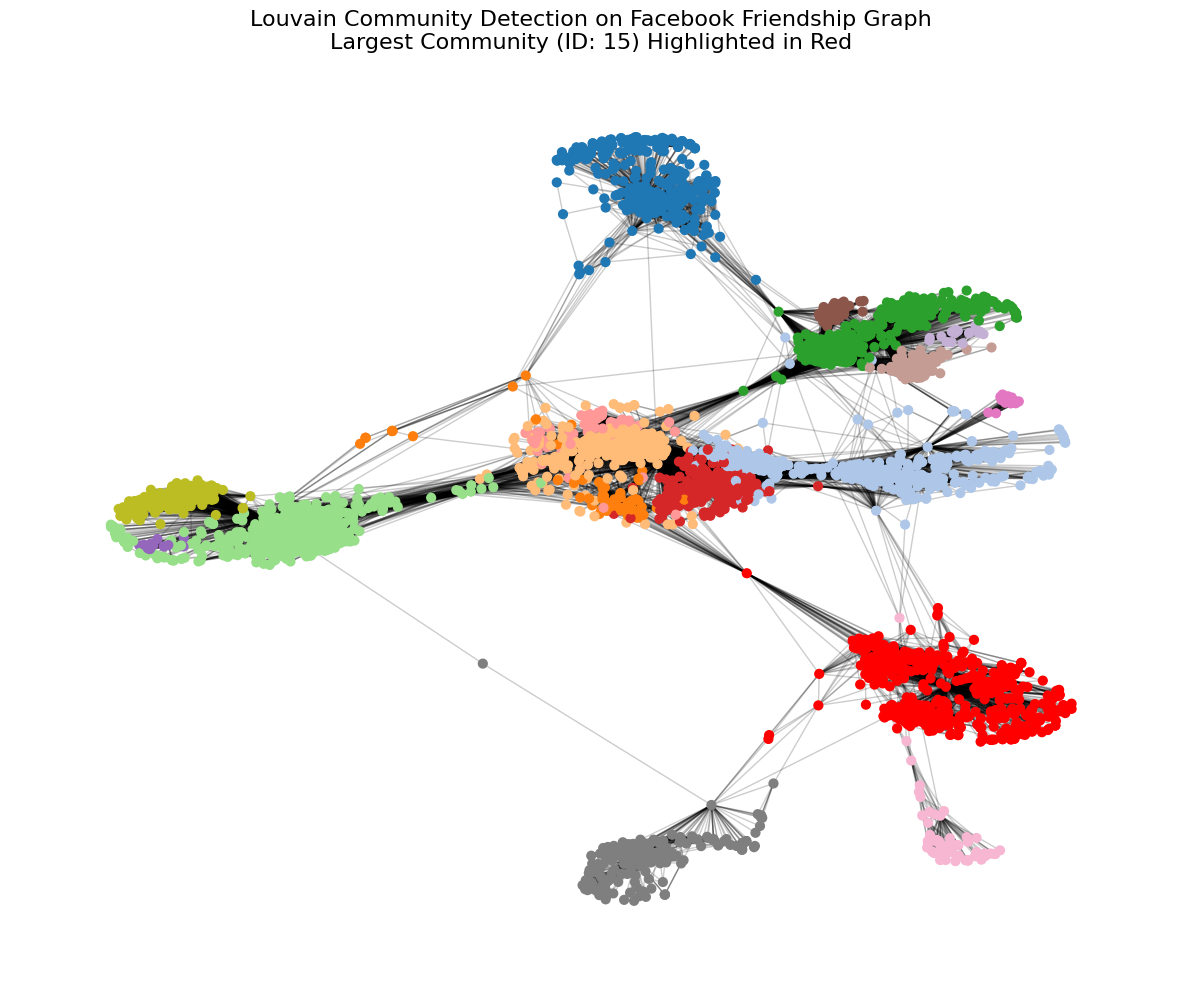

In [9]:
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# Load edge list (assuming 'facebook_combined.txt' is available)
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

# Perform community detection (assuming 'partition' is already computed from a previous cell)
# If partition is not available, uncomment and run the following line:
# partition = community_louvain.best_partition(G)

# Find the largest community
communities_size = {community_id: len(members) for community_id, members in communities.items()}
largest_community_id = max(communities_size, key=communities_size.get)

# Buat warna node, menyoroti komunitas terbesar
node_colors = []
for node in G.nodes():
    if node in partition and partition[node] == largest_community_id:
        node_colors.append('red')  # Highlight largest community in red
    elif node in partition:
        # Use a colormap for other communities, assign a color based on community ID
        node_colors.append(plt.cm.tab20(partition[node] % plt.cm.tab20.N))
    else:
        node_colors.append('gray') # Nodes not in any partition (should not happen if partition is complete)

# Layout
pos = nx.spring_layout(G, seed=42) # For consistent layout

plt.figure(figsize=(15, 12))
nx.draw_networkx_nodes(G, pos, node_size=40, node_color=node_colors, cmap=plt.cm.tab20)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title(f"Louvain Community Detection on Facebook Friendship Graph\nLargest Community (ID: {largest_community_id}) Highlighted in Red", fontsize=16)
plt.axis("off")
plt.show()


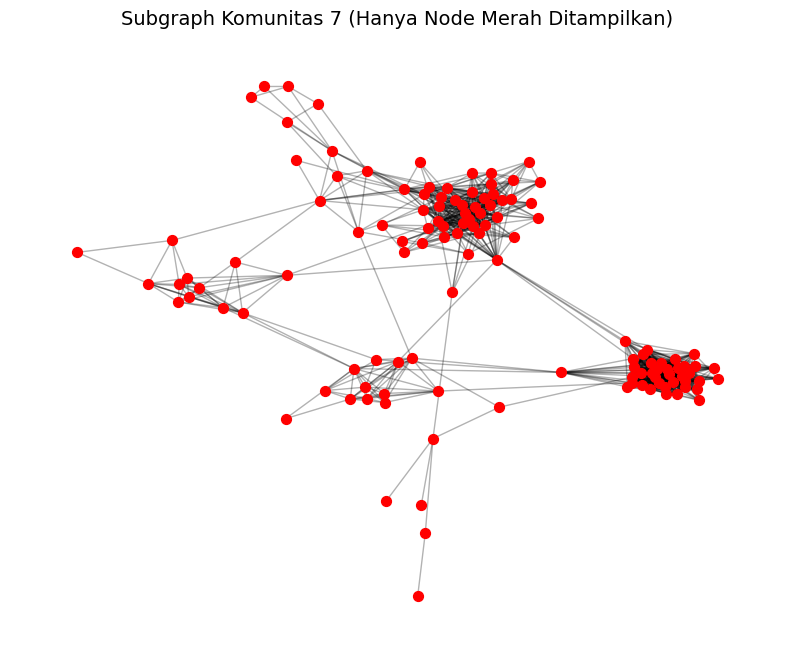

In [10]:
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# Load edge list
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

# Hitung komunitas
partition = community_louvain.best_partition(G)

# Ambil node di komunitas 7
community_id_to_highlight = 7
nodes_in_community_7 = [n for n, c in partition.items() if c == community_id_to_highlight]

# Buat subgraph khusus komunitas 7
G_sub = G.subgraph(nodes_in_community_7)

# Layout khusus subgraf agar lebih rapi
pos = nx.spring_layout(G_sub, seed=42)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_sub, pos, node_size=50, node_color='red')
nx.draw_networkx_edges(G_sub, pos, alpha=0.3)
plt.title(f"Subgraph Komunitas {community_id_to_highlight} (Hanya Node Merah Ditampilkan)", fontsize=14)
plt.axis("off")
plt.show()
